In [74]:
####Importing packages and importing dataset that has to be cleaned for analyzation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/jeeva/OneDrive/Documents/Data cleaning dataset/Sample - Superstore.csv",encoding='latin1')

print("Initial Dataset Shape:",df.shape)
print(df.head())
print(df.info())




Initial Dataset Shape: (9994, 21)
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156  11-08-2016  11-11-2016    Second Class    CG-12520   
1       2  CA-2016-152156  11-08-2016  11-11-2016    Second Class    CG-12520   
2       3  CA-2016-138688  06-12-2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10-11-2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10-11-2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Su

In [58]:
####check for missing values

print("Missing values before handling:")
print(df.isnull().sum())

Missing values before handling:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [57]:
#####Since no null value is present in the columns,There is no need to fill missing values in the columns and shall remove the duplicates.

df.drop_duplicates()
print("\nShape after removing duplicates:", df.shape)



Shape after removing duplicates: (9990, 21)


In [56]:
####Standardize the text fields(dtype=obj)

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.title().str.strip()

In [65]:
####Convert datatypes
df['Postal Code'] = df['Postal Code'].astype(str)
df['Order Date'] = pd.to_datetime(df['Order Date'],dayfirst='false', format='mixed')
df['Ship Date'] = pd.to_datetime(df['Ship Date'],dayfirst='false', format='mixed')

In [54]:
####Handling invalid values
df = df[df['Quantity'] > 0]
df = df[df['Sales'] >= 0]


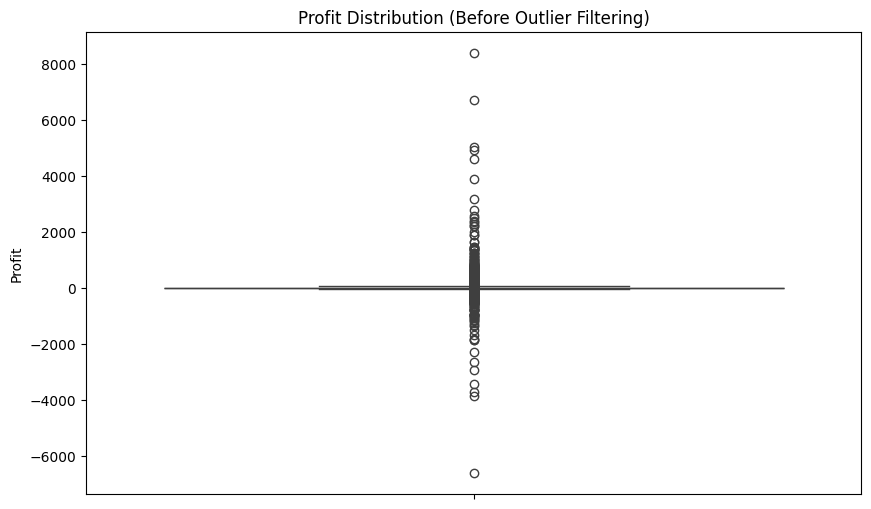

In [ ]:
####Removing the extreme outliers as it may affect the analysis later(Depends on the business workflow)
plt.figure(figsize=(10,6))
sns.boxplot(df['Profit'])
plt.title('Profit Distribution (Before Outlier Filtering)')
plt.show()

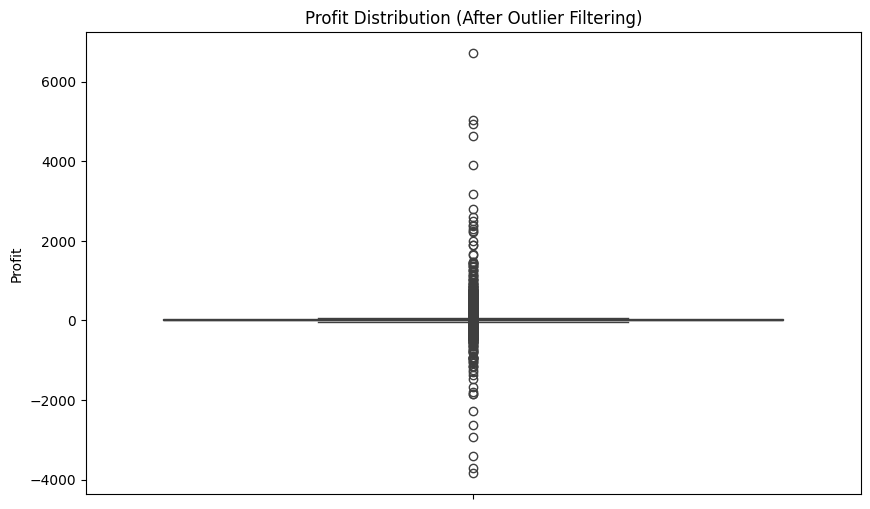

In [63]:
####Removed profit=-5000 and profit<=7000 as based on the business data
df = df[df['Profit'] > -5000]
df = df[df['Profit'] <= 7000]

plt.figure(figsize=(10,6))
sns.boxplot(df['Profit'])
plt.title('Profit Distribution (After Outlier Filtering)')
plt.show()

In [70]:
####Cleaned dataset for further analyzation
print("\nCleaned Dataset Info:")
print(df.info())
print(df.describe())



Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 9992 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9992 non-null   int64         
 1   Order ID       9992 non-null   object        
 2   Order Date     9992 non-null   datetime64[ns]
 3   Ship Date      9992 non-null   datetime64[ns]
 4   Ship Mode      9992 non-null   object        
 5   Customer ID    9992 non-null   object        
 6   Customer Name  9992 non-null   object        
 7   Segment        9992 non-null   object        
 8   Country        9992 non-null   object        
 9   City           9992 non-null   object        
 10  State          9992 non-null   object        
 11  Postal Code    9992 non-null   object        
 12  Region         9992 non-null   object        
 13  Product ID     9992 non-null   object        
 14  Category       9992 non-null   object        
 15  Sub

In [73]:
####Saving the cleaned data as file
df.to_csv('C:/Users/jeeva/Downloads/Power BI/archive/Superstore_Cleaned.csv', index=False)
